In [1]:
import networkx as nx
import pandas as pd
import geopandas as gpd
import config as cfg
import numpy as np
import matplotlib.pyplot as plt
from utils import build_trip_count, get_district_names, get_income_data, add_quantiles, normalize_by_pop

In [2]:
all_viajes = pd.read_csv('/Users/caro/Desktop/thesis_project/mobility_data/VIAJES/all_viajes_month_0322.csv') # all trips
income = gpd.read_file('/Users/caro/Desktop/thesis_project/segregation_indices/data/processed/geometries_and_income.geojson') # income data
gdf = gpd.read_file(cfg.ZONIFICACION_DATA / 'distritos/madrid_gdf.geojson') # geodataframe
# gdf = gdf.to_crs(epsg=4326)
district_mapping = pd.read_csv('/Users/caro/Desktop/thesis_project/data_overview/outputs/districts_and_population.csv')

In [3]:
filtered_df = all_viajes.loc[(all_viajes['actividad_origen'] == 'casa')] # home origin trips

In [4]:
filtered_df['avg_distancia'] = filtered_df['viajes_km'] / filtered_df['viajes']

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_94335/2907657162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['avg_distancia'] = filtered_df['viajes_km'] / filtered_df['viajes']


In [5]:
district_counts = filtered_df['origen'].value_counts().reset_index() # counting total trops from origin based on district
district_counts.columns = ['ID', 'Population']

In [6]:
trip_counts = build_trip_count(filtered_df)
trip_counts = get_district_names(trip_counts)
trip_counts = normalize_by_pop(trip_counts, district_counts)

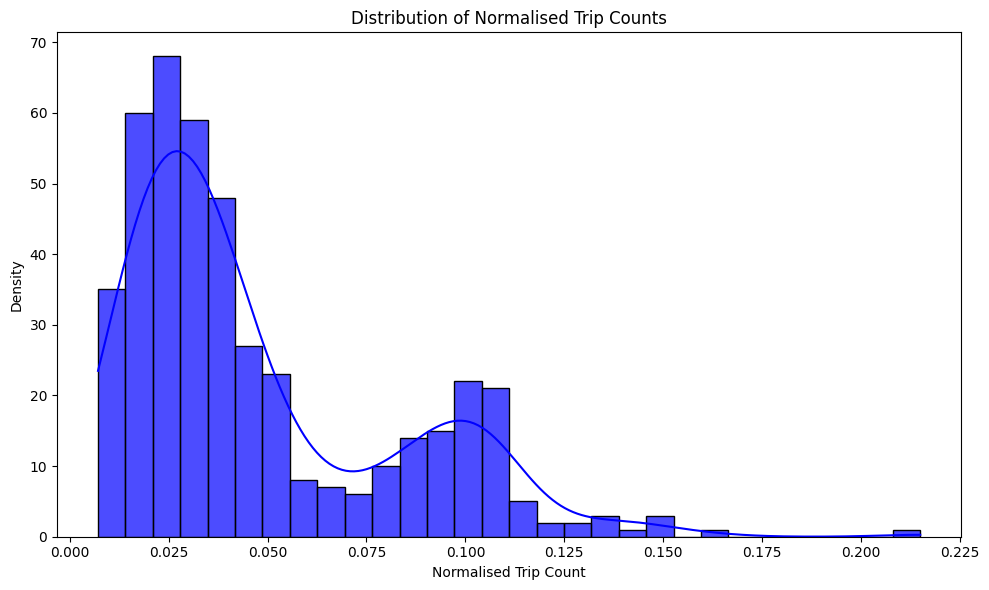

In [6]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Plotting the distribution using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(trip_counts['normalized_trip_count'], bins=30, kde=True, color='blue', alpha=0.7)
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.title('Distribution of Normalised Trip Counts')
plt.xlabel('Normalised Trip Count')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [7]:
trip_counts = get_income_data(trip_counts, income, 'Gini Index', 'Median income per consumption unit')
trip_counts = add_quantiles(trip_counts, 'Median income per consumption unit', n_quantiles=4)
trip_counts = add_quantiles(trip_counts, 'Gini Index', n_quantiles=4)

In [8]:
trip_counts

,trip_count,origin,destination,normalized_trip_count,Origin Gini Index,Origin Median income per consumption unit,Destination Gini Index,Destination Median income per consumption unit,income decile origin Median income per consumption unit,income decile destination Median income per consumption unit,income decile origin Gini Index,income decile destination Gini Index
0,23450,Centro,Centro,0.102373,39.8,20650,39.8,20650,2,2,3,3
1,20538,Centro,Arganzuela,0.089661,39.8,20650,31.0,26250,2,2,3,0
2,16117,Centro,Retiro,0.070360,39.8,20650,33.1,30450,2,3,3,1
3,16966,Centro,Salamanca,0.074067,39.8,20650,40.2,29750,2,3,3,3
4,9214,Centro,Chamartín,0.040225,39.8,20650,40.2,32550,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
436,1108,Barajas,Villaverde,0.008434,33.2,25550,31.9,15050,2,0,1,1
437,1976,Barajas,Villa de Vallecas,0.015042,33.2,25550,31.1,18550,2,0,1,0
438,2121,Barajas,Vicálvaro,0.016145,33.2,25550,30.4,19250,2,1,1,0
439,19764,Barajas,San Blas-Canillejas,0.150448,33.2,25550,33.8,19250,2,1,1,2


In [12]:
trip_counts[trip_counts['origin']=='Chamberí']

,trip_count,origin,destination,normalized_trip_count,Origin Gini Index,Origin Median income per consumption unit,Destination Gini Index,Destination Median income per consumption unit,income decile origin Median income per consumption unit,income decile destination Median income per consumption unit,income decile origin Gini Index,income decile destination Gini Index
126,24792,Chamberí,Centro,0.127637,37.9,29750,39.8,20650,3,2,3,3
127,6167,Chamberí,Arganzuela,0.031750,37.9,29750,31.0,26250,3,2,3,0
128,8082,Chamberí,Retiro,0.041609,37.9,29750,33.1,30450,3,3,3,1
129,19681,Chamberí,Salamanca,0.101324,37.9,29750,40.2,29750,3,3,3,3
130,17873,Chamberí,Chamartín,0.092016,37.9,29750,40.2,32550,3,3,3,3
131,19962,Chamberí,Tetuán,0.102771,37.9,29750,37.6,19250,3,1,3,2
132,21415,Chamberí,Chamberí,0.110251,37.9,29750,37.9,29750,3,3,3,3
133,10214,Chamberí,Fuencarral-El Pardo,0.052585,37.9,29750,34.4,26950,3,2,3,2
134,20367,Chamberí,Moncloa-Aravaca,0.104856,37.9,29750,40.2,29050,3,3,3,3
135,5758,Chamberí,Latina,0.029644,37.9,29750,31.8,17850,3,0,3,0


In [11]:
trip_counts[trip_counts['origin']=='Barajas']

,trip_count,origin,destination,normalized_trip_count,Origin Gini Index,Origin Median income per consumption unit,Destination Gini Index,Destination Median income per consumption unit,income decile origin Median income per consumption unit,income decile destination Median income per consumption unit,income decile origin Gini Index,income decile destination Gini Index
420,5024,Barajas,Centro,0.038244,33.2,25550,39.8,20650,2,2,1,3
421,2102,Barajas,Arganzuela,0.016001,33.2,25550,31.0,26250,2,2,1,0
422,2961,Barajas,Retiro,0.022540,33.2,25550,33.1,30450,2,3,1,1
423,6093,Barajas,Salamanca,0.046381,33.2,25550,40.2,29750,2,3,1,3
424,6112,Barajas,Chamartín,0.046526,33.2,25550,40.2,32550,2,3,1,3
425,4207,Barajas,Tetuán,0.032025,33.2,25550,37.6,19250,2,1,1,2
426,6060,Barajas,Chamberí,0.046130,33.2,25550,37.9,29750,2,3,1,3
427,8456,Barajas,Fuencarral-El Pardo,0.064369,33.2,25550,34.4,26950,2,2,1,2
428,3268,Barajas,Moncloa-Aravaca,0.024877,33.2,25550,40.2,29050,2,3,1,3
429,1097,Barajas,Latina,0.008351,33.2,25550,31.8,17850,2,0,1,0


In [15]:
low_to_high_median = trip_counts[(trip_counts['income decile origin Median income per consumption unit'].isin([0, 1])) & 
                                      (trip_counts['income decile destination Median income per consumption unit'].isin([2, 3]))]

high_to_low_median = trip_counts[(trip_counts['income decile origin Median income per consumption unit'].isin([2, 3])) & 
                                      (trip_counts['income decile destination Median income per consumption unit'].isin([0, 1]))]

low_to_low_median = trip_counts[(trip_counts['income decile origin Median income per consumption unit'].isin([0, 1])) &
(trip_counts['income decile destination Median income per consumption unit'].isin([0, 1]))]

high_to_high_median = trip_counts[(trip_counts['income decile origin Median income per consumption unit'].isin([2, 3])) & 
                                trip_counts['income decile destination Median income per consumption unit'].isin([2, 3])]

In [16]:
high_to_low_median

,trip_count,origin,destination,normalized_trip_count,Origin Gini Index,Origin Median income per consumption unit,Destination Gini Index,Destination Median income per consumption unit,income decile origin Median income per consumption unit,income decile destination Median income per consumption unit,income decile origin Gini Index,income decile destination Gini Index
5,7967,Centro,Tetuán,0.034781,39.8,20650,37.6,19250,2,1,3,2
9,15388,Centro,Latina,0.067178,39.8,20650,31.8,17850,2,0,3,0
10,14034,Centro,Carabanchel,0.061267,39.8,20650,33.1,15750,2,0,3,1
11,8841,Centro,Usera,0.038596,39.8,20650,33.4,14350,2,0,3,1
12,5719,Centro,Puente de Vallecas,0.024967,39.8,20650,31.6,14350,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
434,6271,Barajas,Ciudad Lineal,0.047736,33.2,25550,35.8,19950,2,1,1,2
436,1108,Barajas,Villaverde,0.008434,33.2,25550,31.9,15050,2,0,1,1
437,1976,Barajas,Villa de Vallecas,0.015042,33.2,25550,31.1,18550,2,0,1,0
438,2121,Barajas,Vicálvaro,0.016145,33.2,25550,30.4,19250,2,1,1,0


In [17]:
low_to_high_median.shape

(110, 12)

In [18]:
high_to_low_median.shape

(110, 12)

In [19]:
low_to_low_median.shape

(121, 12)

In [20]:
high_to_high_median.shape

(100, 12)

In [21]:
low_to_high_median['trip_count'].sum()

np.int64(1263786)

In [22]:
lh = low_to_high_median['trip_count'].sum() / trip_counts['trip_count'].sum()
hl = high_to_low_median['trip_count'].sum() / trip_counts['trip_count'].sum()
ll = low_to_low_median['trip_count'].sum() / trip_counts['trip_count'].sum()
hh = high_to_high_median['trip_count'].sum() / trip_counts['trip_count'].sum()

In [23]:
lh + hl + ll + hh

np.float64(1.0)